In [71]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import  RandomForestRegressor
from sklearn.pipeline import make_pipeline
import dill

In [56]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.set_index('Serial No.',inplace=True)

In [57]:
print('Total {} rows are in df'.format(len(df)))
print('Total {} column are in df'.format(df.columns))

Total 500 rows are in df
Total Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object') column are in df


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [59]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [60]:
df.isna().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [65]:
df['Chance of Admit ']

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
496    0.87
497    0.96
498    0.93
499    0.73
500    0.84
Name: Chance of Admit , Length: 500, dtype: float64

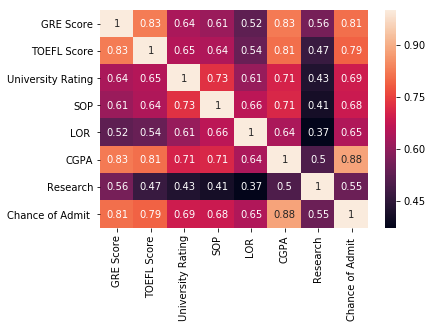

In [61]:
sns.heatmap(df.corr(),annot=True)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Chance of Admit '), df['Chance of Admit '], test_size=0.2)

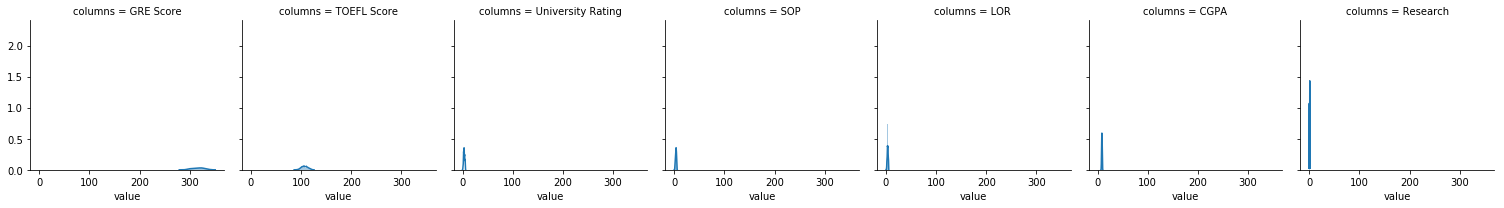

In [67]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot, 'value'))

In [68]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns=X_test.columns)

/home/shoeb/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/shoeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/shoeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


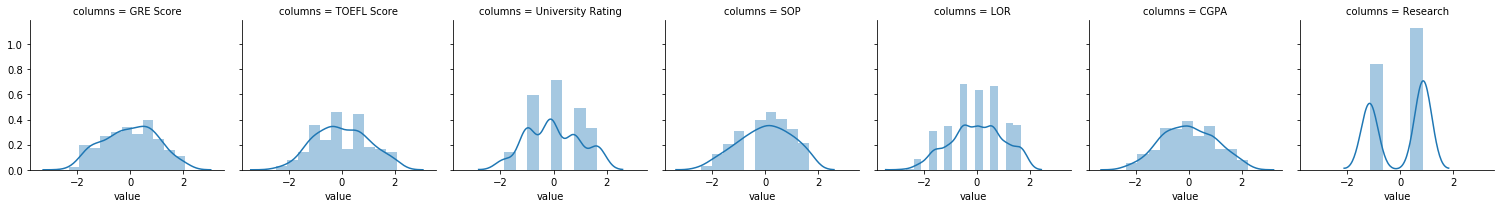

In [69]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot, 'value'))

In [72]:
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [50, 100, 250, 300],
                              'max_depth': [None, 100, 200, 300, 400]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,0.190349,0.008761,0.012475,0.000632,None,300,"{'max_depth': None, 'n_estimators': 300}",0.753805,0.780854,0.793858,0.776116,0.016700
2,0.174356,0.000410,0.011201,0.000210,400,300,"{'max_depth': 400, 'n_estimators': 300}",0.756985,0.775919,0.792167,0.774978,0.014387
3,0.151619,0.004054,0.010079,0.000103,200,250,"{'max_depth': 200, 'n_estimators': 250}",0.752574,0.779016,0.792330,0.774585,0.016539
4,0.175945,0.001765,0.011233,0.000069,300,300,"{'max_depth': 300, 'n_estimators': 300}",0.753709,0.778870,0.791149,0.774524,0.015599
5,0.148674,0.003091,0.009860,0.000115,100,250,"{'max_depth': 100, 'n_estimators': 250}",0.754640,0.779192,0.789102,0.774262,0.014502
6,0.155557,0.006709,0.010044,0.000716,None,250,"{'max_depth': None, 'n_estimators': 250}",0.753459,0.778735,0.790596,0.774211,0.015503
7,0.188555,0.009519,0.012427,0.000402,100,300,"{'max_depth': 100, 'n_estimators': 300}",0.750203,0.780744,0.791362,0.774043,0.017466
8,0.062580,0.001778,0.004226,0.000166,200,100,"{'max_depth': 200, 'n_estimators': 100}",0.761533,0.772512,0.787841,0.773931,0.010794
9,0.064799,0.001282,0.004551,0.000339,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.753786,0.773081,0.793365,0.773361,0.016169


In [76]:
print('model Prediction: ' + str(gridsearch.predict(X=scaler.transform(df.drop(columns='Chance of Admit ').iloc[0].values.reshape(1, -1)))[0]))

model Prediction: 0.9309666666666632
